In [103]:
import pandas as pd
import numpy as np

In [104]:
data = {"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
       "score":[1,2,np.nan,4,5,6,7,10]}

In [105]:
df1=pd.DataFrame(data)
df1

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [106]:
df1[df1['grammer']=="Python"]

,grammer,score
0,Python,1.0
7,Python,10.0


In [107]:
df1.columns

Index(['grammer', 'score'], dtype='object')

In [108]:
df1=df1.rename(columns={'score':'popularity'})#,inplace=True参数使返回值为none，原地算法

In [109]:
pd.DataFrame([(lang,df1['grammer'].tolist().count(lang)) for lang in set(df1['grammer'])])#解法1

,0,1
0,NaN,1
1,Python,2
2,Java,1
3,GO,1
4,SQL,1
5,PHP,1
6,C,1


In [110]:
df1['grammer'].value_counts()#解法2

Python    2
PHP       1
Java      1
C         1
SQL       1
GO        1
Name: grammer, dtype: int64

In [111]:
df1['popularity'].interpolate()

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7    10.0
Name: popularity, dtype: float64

In [112]:
df1['popularity'] = df1['popularity'].fillna(df1['popularity'].interpolate())
df1

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [113]:
df1[df1['popularity']>3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [114]:
df1=df1.drop_duplicates(['grammer'])

In [115]:
df1['popularity'].mean()

4.0

In [116]:
df1['grammer'].tolist()

['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP']

In [117]:
df1.to_excel('dataprocesslearning1.xlsx')

In [118]:
df1.shape

(7, 2)

In [119]:
df1[(df1['popularity']>3) & (df1['popularity']<7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


In [120]:
type(df1['popularity']>3),df1['popularity']>3

(pandas.core.series.Series,
 0    False
 1    False
 2    False
 3     True
 4     True
 5     True
 6     True
 Name: popularity, dtype: bool)

In [121]:
temp=df1['popularity']
temp

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
Name: popularity, dtype: float64

In [122]:
df1=df1.drop(columns=['popularity'])

In [123]:
df1.insert(0,'popularity',temp)
df1

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP


In [124]:
df1[df1['popularity']==max(df1['popularity'])]

,popularity,grammer
6,7.0,PHP


In [125]:
df1.head()

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN


In [126]:
df1.tail()

,popularity,grammer
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP


In [127]:
df1=df1.drop(df1.shape[0]-1,axis=0)#与df1=df1.drop(index=df1.shape[0]-1)等效
df1

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL


In [128]:
appendrow={'grammer':'Perl','popularity':6.6}
df1=df1.append(appendrow,ignore_index=True)
df1

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,6.6,Perl


In [129]:
df1.sort_values(['popularity'],inplace=True)
df1

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,6.6,Perl


In [130]:
df1['grammer'] = df1['grammer'].fillna('R')

In [131]:
[df1['grammer'][i] for i in range(df1['grammer'].shape[0])]

['Python', 'C', 'Java', 'GO', 'R', 'SQL', 'Perl']

In [132]:
[len(df1['grammer'][i]) for i in range(df1['grammer'].shape[0])]

[6, 1, 4, 2, 1, 3, 4]

In [133]:
df1['len_str']=df1['grammer'].map(lambda x:len(x))
df1

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Java,4
3,4.0,GO,2
4,5.0,R,1
5,6.0,SQL,3
6,6.6,Perl,4


In [134]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [135]:
df2=pd.read_excel(r'E:\Study\\Pythonlearning\\Pandaslearning\\pandas120\\21-50数据.xlsx')
df2.head()

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k


In [136]:
# import re
# for index,row in df2.iterrows():
#     nums = re.findall('\d+',row[2])
#     df2.iloc[index,2] = int(eval(f'({nums[0]} + {nums[1]}) / 2 * 1000'))

# df2

In [137]:
def func(df):
    lst=df['salary'].split('-')
    smin=int(lst[0].strip('k'))
    smax=int(lst[1].strip('k'))
    df['salary']=int((smin+smax)/2*1000)
    return df

df2=df2.apply(func,axis=1)
df2

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500
1,2020-03-16 10:58:48,本科,30000
2,2020-03-16 10:46:39,不限,27500
3,2020-03-16 10:45:44,本科,16500
4,2020-03-16 10:20:41,本科,15000
...,...,...,...
130,2020-03-16 11:36:07,本科,14000
131,2020-03-16 09:54:47,硕士,37500
132,2020-03-16 10:48:32,本科,30000
133,2020-03-16 10:46:31,本科,19000


In [138]:
df2.groupby('education')['salary'].mean().to_frame()
df2.groupby('education').mean()

,salary
education,
不限,19600.000000
大专,10000.000000
本科,19361.344538
硕士,20642.857143


In [139]:
for index,col in df2.iterrows():
    df2.iloc[index,0]=df2.iloc[index,0].to_pydatetime().strftime("%m-%d")

In [140]:
df2.head()

,createTime,education,salary
0,03-16,本科,27500
1,03-16,本科,30000
2,03-16,不限,27500
3,03-16,本科,16500
4,03-16,本科,15000


In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   createTime  135 non-null    object
 1   education   135 non-null    object
 2   salary      135 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [142]:
df2.describe()

,salary
count,135.000000
mean,19159.259259
std,8661.686922
min,3500.000000
25%,14000.000000
50%,17500.000000
75%,25000.000000
max,45000.000000


In [143]:
bins = [0,5000, 20000, 50000]
group_names = ['低', '中', '高']
df2['categories'] = pd.cut(df2['salary'], bins, labels=group_names)

In [144]:
df2

,createTime,education,salary,categories
0,03-16,本科,27500,高
1,03-16,本科,30000,高
2,03-16,不限,27500,高
3,03-16,本科,16500,中
4,03-16,本科,15000,中
...,...,...,...,...
130,03-16,本科,14000,中
131,03-16,硕士,37500,高
132,03-16,本科,30000,高
133,03-16,本科,19000,中


In [145]:
df2.sort_values(by=['salary'],ascending=False)

,createTime,education,salary,categories
53,03-16,本科,45000,高
37,03-16,本科,40000,高
101,03-16,本科,37500,高
16,03-16,本科,37500,高
131,03-16,硕士,37500,高
...,...,...,...,...
123,03-16,本科,4500,低
126,03-16,本科,4000,低
110,03-16,本科,4000,低
96,03-16,不限,3500,低


In [146]:
df2.iloc[32]

createTime    03-16
education        硕士
salary        22500
categories        高
Name: 32, dtype: object

In [147]:
np.median(df2['salary'])

17500.0

<AxesSubplot:ylabel='Frequency'>

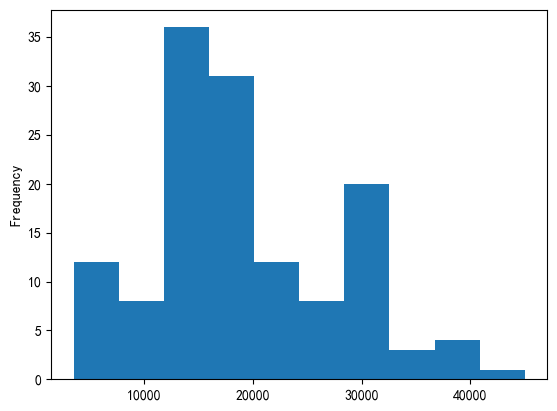

In [148]:
df2.salary.plot(kind='hist')

(array([12.,  8., 36., 31., 12.,  8., 20.,  3.,  4.,  1.]),
 array([ 3500.,  7650., 11800., 15950., 20100., 24250., 28400., 32550.,
        36700., 40850., 45000.]),
 <BarContainer object of 10 artists>)

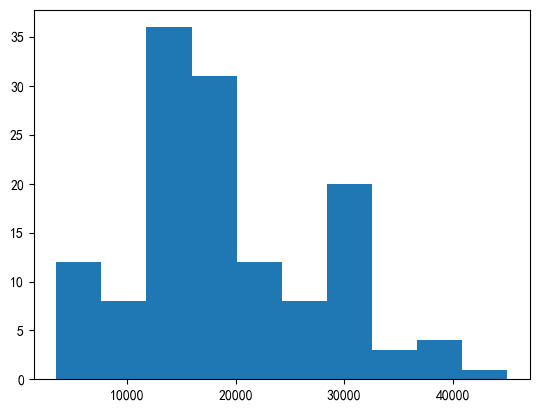

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.hist(df2.salary)

<AxesSubplot:ylabel='Density'>

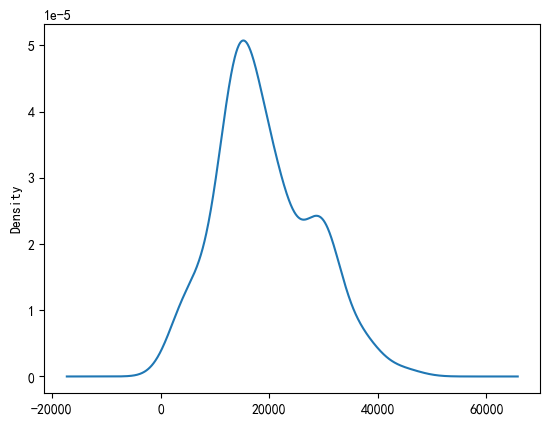

In [150]:
df2.salary.plot(kind='kde')

In [151]:
del df2['categories']

In [152]:
df2['test']=df2['education']+df2['createTime']

In [153]:
df2

,createTime,education,salary,test
0,03-16,本科,27500,本科03-16
1,03-16,本科,30000,本科03-16
2,03-16,不限,27500,不限03-16
3,03-16,本科,16500,本科03-16
4,03-16,本科,15000,本科03-16
...,...,...,...,...
130,03-16,本科,14000,本科03-16
131,03-16,硕士,37500,硕士03-16
132,03-16,本科,30000,本科03-16
133,03-16,本科,19000,本科03-16


In [154]:
df2['test1']=df2['salary'].map(str)+df2['education']

In [155]:
max(df2['salary'])-min(df2['salary'])

41500

In [156]:
df2[['salary']].apply(lambda x:x.max()-x.min())

salary    41500
dtype: int64

In [157]:
pd.concat([df2[1:2], df2[-1:]])

,createTime,education,salary,test,test1
1,03-16,本科,30000,本科03-16,30000本科
134,03-16,本科,30000,本科03-16,30000本科


In [158]:
df2.append(df2.iloc[7])

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
1,03-16,本科,30000,本科03-16,30000本科
2,03-16,不限,27500,不限03-16,27500不限
3,03-16,本科,16500,本科03-16,16500本科
4,03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...,...
131,03-16,硕士,37500,硕士03-16,37500硕士
132,03-16,本科,30000,本科03-16,30000本科
133,03-16,本科,19000,本科03-16,19000本科
134,03-16,本科,30000,本科03-16,30000本科


In [159]:
df2.columns

Index(['createTime', 'education', 'salary', 'test', 'test1'], dtype='object')

In [160]:
df2.dtypes

createTime    object
education     object
salary         int64
test          object
test1         object
dtype: object

In [161]:
df2.set_index('createTime')

,education,salary,test,test1
createTime,,,,
03-16,本科,27500,本科03-16,27500本科
03-16,本科,30000,本科03-16,30000本科
03-16,不限,27500,不限03-16,27500不限
03-16,本科,16500,本科03-16,16500本科
03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...
03-16,本科,14000,本科03-16,14000本科
03-16,硕士,37500,硕士03-16,37500硕士
03-16,本科,30000,本科03-16,30000本科


In [162]:
df3=pd.DataFrame(pd.Series(np.random.randint(1,10,135)))

In [163]:
df3

,0
0,4
1,2
2,8
3,1
4,8
...,...
130,5
131,2
132,3
133,8


In [164]:
df2=pd.concat([df2,df3],axis=1)

In [165]:
df2

,createTime,education,salary,test,test1,0
0,03-16,本科,27500,本科03-16,27500本科,4
1,03-16,本科,30000,本科03-16,30000本科,2
2,03-16,不限,27500,不限03-16,27500不限,8
3,03-16,本科,16500,本科03-16,16500本科,1
4,03-16,本科,15000,本科03-16,15000本科,8
...,...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科,5
131,03-16,硕士,37500,硕士03-16,37500硕士,2
132,03-16,本科,30000,本科03-16,30000本科,3
133,03-16,本科,19000,本科03-16,19000本科,8


In [166]:
df2['new']=df2['salary']-df2[0]

In [167]:
df2

,createTime,education,salary,test,test1,0,new
0,03-16,本科,27500,本科03-16,27500本科,4,27496
1,03-16,本科,30000,本科03-16,30000本科,2,29998
2,03-16,不限,27500,不限03-16,27500不限,8,27492
3,03-16,本科,16500,本科03-16,16500本科,1,16499
4,03-16,本科,15000,本科03-16,15000本科,8,14992
...,...,...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科,5,13995
131,03-16,硕士,37500,硕士03-16,37500硕士,2,37498
132,03-16,本科,30000,本科03-16,30000本科,3,29997
133,03-16,本科,19000,本科03-16,19000本科,8,18992


In [168]:
df2.isnull().values.any()

False

In [169]:
df2['salary'].astype(np.float64)

0      27500.0
1      30000.0
2      27500.0
3      16500.0
4      15000.0
        ...   
130    14000.0
131    37500.0
132    30000.0
133    19000.0
134    30000.0
Name: salary, Length: 135, dtype: float64

In [170]:
len(df2[df2['salary']>10000])

119

In [171]:
df2['education'].value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: education, dtype: int64

In [172]:
df2.education.value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: education, dtype: int64

In [173]:
df2['education'].nunique()

4

In [174]:
df2[df2['salary']+df2['new']>60000].tail(3)#解法1

,createTime,education,salary,test,test1,0,new
92,03-16,本科,35000,本科03-16,35000本科,1,34999
101,03-16,本科,37500,本科03-16,37500本科,9,37491
131,03-16,硕士,37500,硕士03-16,37500硕士,2,37498


In [175]:
rowsums=df2[['salary','new']].apply(np.sum,axis=1)
res=df2.iloc[np.where(rowsums>60000)[0][-3:],:]
res

,createTime,education,salary,test,test1,0,new
92,03-16,本科,35000,本科03-16,35000本科,1,34999
101,03-16,本科,37500,本科03-16,37500本科,9,37491
131,03-16,硕士,37500,硕士03-16,37500硕士,2,37498


In [176]:
df4=pd.read_excel(r'E:\Study\\Pythonlearning\\Pandaslearning\\pandas120\\51-80数据.xls')
df4.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
3,600000.SH,浦发银行,2016-01-07,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
4,600000.SH,浦发银行,2016-01-08,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471


In [177]:
df4.isnull().sum()

代码           1
简称           2
日期           2
前收盘价(元)      2
开盘价(元)       2
最高价(元)       2
最低价(元)       2
收盘价(元)       2
成交量(股)       2
成交金额(元)      2
涨跌(元)        2
涨跌幅(%)       2
均价(元)        2
换手率(%)       2
A股流通市值(元)    2
总市值(元)       2
A股流通股本(股)    2
市盈率          2
dtype: int64

In [178]:
df4[df4['日期'].isnull()]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
for i in df4.columns:
    if df4[i].count()!=len(df4):
        row=df4[df4[i].isnull()].index.tolist()
        print('列名："{}", 第{}行位置有缺失值'.format(i,row))

列名："代码", 第[327]行位置有缺失值
列名："简称", 第[327, 328]行位置有缺失值
列名："日期", 第[327, 328]行位置有缺失值
列名："前收盘价(元)", 第[327, 328]行位置有缺失值
列名："开盘价(元)", 第[327, 328]行位置有缺失值
列名："最高价(元)", 第[327, 328]行位置有缺失值
列名："最低价(元)", 第[327, 328]行位置有缺失值
列名："收盘价(元)", 第[327, 328]行位置有缺失值
列名："成交量(股)", 第[327, 328]行位置有缺失值
列名："成交金额(元)", 第[327, 328]行位置有缺失值
列名："涨跌(元)", 第[327, 328]行位置有缺失值
列名："涨跌幅(%)", 第[327, 328]行位置有缺失值
列名："均价(元)", 第[327, 328]行位置有缺失值
列名："换手率(%)", 第[327, 328]行位置有缺失值
列名："A股流通市值(元)", 第[327, 328]行位置有缺失值
列名："总市值(元)", 第[327, 328]行位置有缺失值
列名："A股流通股本(股)", 第[327, 328]行位置有缺失值
列名："市盈率", 第[327, 328]行位置有缺失值


In [180]:
df4.dropna(axis=0,how='any',inplace=True)

<AxesSubplot:>

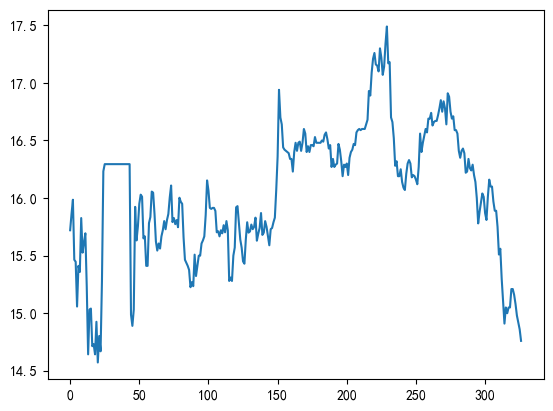

In [181]:
%matplotlib inline
df4['收盘价(元)'].plot(kind='line')

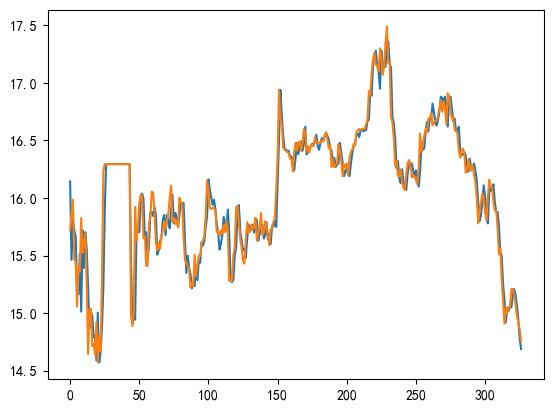

In [182]:
plt.plot(df4['开盘价(元)'])
plt.plot(df4['收盘价(元)'])
plt.show()

<AxesSubplot:>

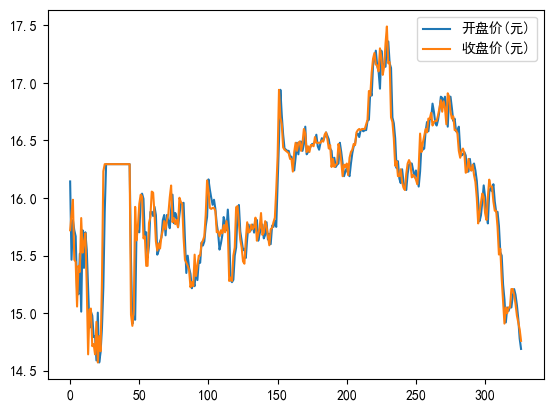

In [183]:
df4[['开盘价(元)','收盘价(元)']].plot()

In [184]:
temp=pd.DataFrame()

In [185]:
for index,row in df4.iterrows():
    if type(row[13])!=float:
        temp=temp.append([df4.loc[index]])
temp.head()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [186]:
df4[df4['换手率(%)'].apply(type)!=float].head()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [187]:
df4=df4.reset_index(drop=True)

In [188]:
df4.drop(df4[df4['换手率(%)'].apply(type)!=float].index,inplace=True)

<AxesSubplot:ylabel='Density'>

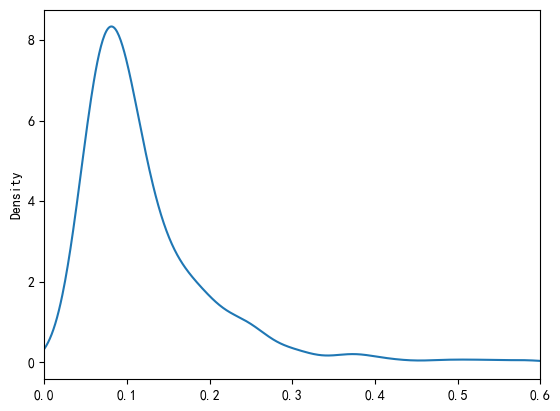

In [189]:
df4['换手率(%)'].plot(kind='kde',xlim=(0,0.6))

In [190]:
df4['收盘价(元)'].diff()

0         NaN
1      0.1413
2      0.1237
3     -0.5211
4     -0.0177
        ...  
322   -0.0800
323   -0.1000
324   -0.0600
325   -0.0600
326   -0.1000
Name: 收盘价(元), Length: 309, dtype: float64

In [192]:
df4['收盘价(元)'].pct_change()

0           NaN
1      0.008988
2      0.007799
3     -0.032598
4     -0.001145
         ...   
322   -0.005277
323   -0.006631
324   -0.004005
325   -0.004021
326   -0.006729
Name: 收盘价(元), Length: 309, dtype: float64

In [193]:
df4.set_index('日期')

,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,
2016-01-04,600000.SH,浦发银行,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
2016-01-05,600000.SH,浦发银行,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2016-01-06,600000.SH,浦发银行,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
2016-01-07,600000.SH,浦发银行,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
2016-01-08,600000.SH,浦发银行,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,600000.SH,浦发银行,15.1600,15.1600,15.1600,15.0500,15.0800,14247943,215130847,-0.0800,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
2017-05-04,600000.SH,浦发银行,15.0800,15.0700,15.0700,14.9000,14.9800,19477788,291839737,-0.1000,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
2017-05-05,600000.SH,浦发银行,14.9800,14.9500,14.9800,14.5200,14.9200,40194577,592160198,-0.0600,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744


In [194]:
df4['收盘价(元)'].rolling(5).sum()

0          NaN
1          NaN
2          NaN
3          NaN
4      78.4789
        ...   
322    75.7100
323    75.6400
324    75.3500
325    75.0000
326    74.6000
Name: 收盘价(元), Length: 309, dtype: float64

<AxesSubplot:>

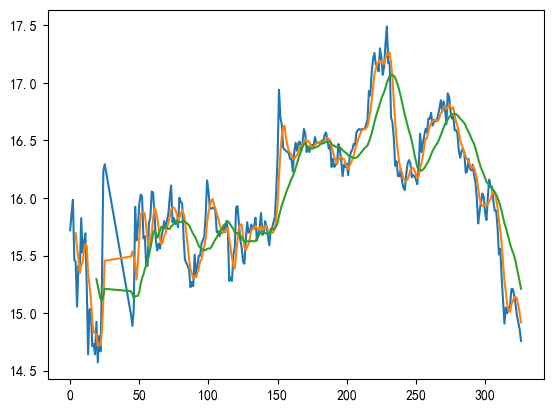

In [195]:
df4['收盘价(元)'].plot()
df4['收盘价(元)'].rolling(5).mean().plot()
df4['收盘价(元)'].rolling(20).mean().plot()

In [197]:
df4=df4.set_index('日期')
df4['收盘价(元)'].resample('W').max()

日期
2016-01-10    15.9855
2016-01-17    15.8265
2016-01-24    15.6940
2016-01-31    15.0405
2016-02-07    16.2328
               ...   
2017-04-16    15.9700
2017-04-23    15.5600
2017-04-30    15.2100
2017-05-07    15.1600
2017-05-14    14.8600
Freq: W-SUN, Name: 收盘价(元), Length: 71, dtype: float64

<AxesSubplot:xlabel='日期'>

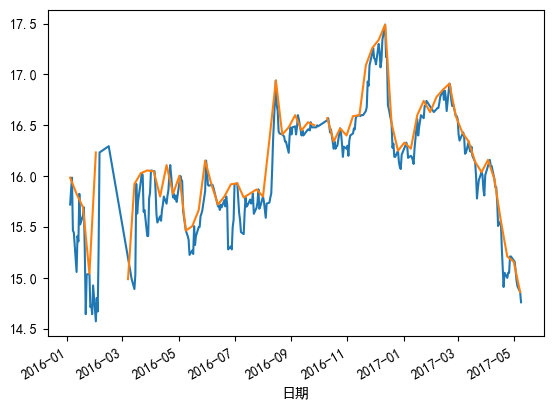

In [198]:
df4['收盘价(元)'].plot()
df4['收盘价(元)'].resample('7D').max().plot()

In [199]:
df4.shift(5)

,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,600000.SH,浦发银行,15.00,15.02,15.10,14.99,15.05,12975919,195296862,0.05,0.3333,15.0507,0.06,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-04,600000.SH,浦发银行,15.05,15.06,15.11,15.00,15.05,14939871,225022668,0.00,0.0000,15.0619,0.0691,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-05,600000.SH,浦发银行,15.05,15.05,15.25,15.03,15.21,22887645,345791526,0.16,1.0631,15.1082,0.1059,3.288140e+11,3.288140e+11,2.161828e+10,6.1925


In [200]:
df4.shift(-5)

,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,
2016-01-04,600000.SH,浦发银行,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.180417e+11,3.180417e+11,1.865347e+10,6.2849
2016-01-05,600000.SH,浦发银行,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.255031e+11,3.255031e+11,1.865347e+10,6.4324
2016-01-06,600000.SH,浦发银行,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.243839e+11,3.243839e+11,1.865347e+10,6.4102
2016-01-07,600000.SH,浦发银行,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.294,3.342702e+11,3.342702e+11,1.865347e+10,6.6056
2016-01-08,600000.SH,浦发银行,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.279280e+11,3.279280e+11,1.865347e+10,6.4803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='日期'>

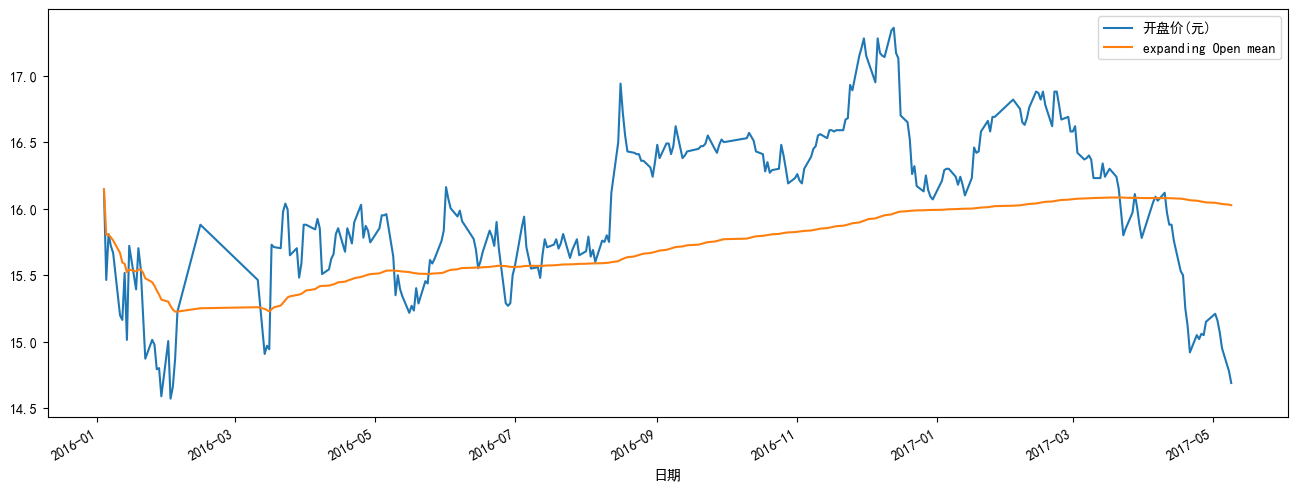

In [204]:
df4['expanding Open mean']=df4['开盘价(元)'].expanding(min_periods=1).mean()
df4[['开盘价(元)', 'expanding Open mean']].plot(figsize=(16, 6))

In [206]:
df4['former 30 days rolling Close mean']=df4['收盘价(元)'].rolling(20).mean()
df4['upper bound']=df4['former 30 days rolling Close mean']+2*df4['收盘价(元)'].rolling(20).std()
df4['lower bound']=df4['former 30 days rolling Close mean']-2*df4['收盘价(元)'].rolling(20).std()

<AxesSubplot:xlabel='日期'>

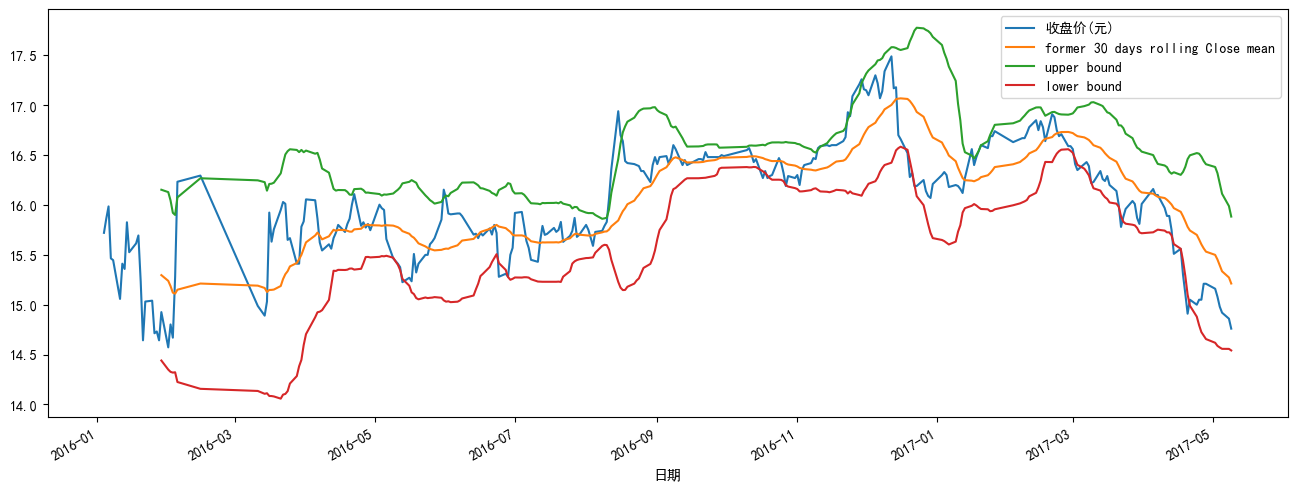

In [207]:
df4[['收盘价(元)', 'former 30 days rolling Close mean','upper bound','lower bound']].plot(figsize=(16, 6))

In [209]:
print(np.__version__)
print(pd.__version__)

1.21.5
1.2.4


In [215]:
tem=np.random.randint(1,100,20)
df1=pd.DataFrame(tem)

In [216]:
tem=np.arange(0,100,5)
df2=pd.DataFrame(tem)

In [217]:
tem=np.random.normal(0,1,20)
df3=pd.DataFrame(tem)

In [218]:
df=pd.concat([df1,df2,df3],axis=0,ignore_index=True)

In [220]:
df=pd.concat([df1,df2,df3],axis=1,ignore_index=True)

In [221]:
np.percentile(df,q=[0,25,50,75,100])

array([-1.02305025,  0.50599667, 22.5       , 60.25      , 95.        ])

In [222]:
df.columns=['col1','col2','col3']

In [223]:
df['col1'][~df['col1'].isin(df['col2'])]

1     57
2     66
3     13
4      6
5     37
6     84
7     26
8     82
9     49
11    61
12    41
13     9
14    11
15    46
19    81
Name: col1, dtype: int32

In [225]:
temp=df['col1'].append(df['col2'])
temp.value_counts()[:3]

5     2
70    2
75    2
dtype: int64

In [228]:
np.argwhere(df['col1'] % 5==0)

ValueError: Length of passed values is 1, index implies 20.

In [234]:
np.argwhere(np.array(df['col1']%5==0))

array([[ 0],
       [10],
       [16],
       [17],
       [18]], dtype=int64)

In [233]:
df[df['col1'].apply(lambda x:x%5==0)].index

Int64Index([0, 10, 16, 17, 18], dtype='int64')

In [235]:
df['col1'].diff().tolist()

[nan,
 -13.0,
 9.0,
 -53.0,
 -7.0,
 31.0,
 47.0,
 -58.0,
 56.0,
 -33.0,
 1.0,
 11.0,
 -20.0,
 -32.0,
 2.0,
 35.0,
 -41.0,
 75.0,
 -5.0,
 6.0]

In [236]:
df.iloc[:,::-1]

,col3,col2,col1
0,-0.385694,0,70
1,0.863602,5,57
2,0.877823,10,66
3,-0.579778,15,13
4,-0.517579,20,6
5,0.273027,25,37
6,-0.295074,30,84
7,-0.066730,35,26
8,-0.291362,40,82
9,-1.023050,45,49


In [237]:
df['col1'].take([1,10,15])
# 等价于
df.iloc[[1,10,15],0]

1     57
10    50
15    46
Name: col1, dtype: int32

In [244]:
res=np.diff(np.sign(np.diff(df['col1'])))
np.where(res==-2)[0]+1

array([ 2,  6,  8, 11, 15, 17], dtype=int64)

In [242]:
df

,col1,col2,col3
0,70,0,-0.385694
1,57,5,0.863602
2,66,10,0.877823
3,13,15,-0.579778
4,6,20,-0.517579
5,37,25,0.273027
6,84,30,-0.295074
7,26,35,-0.066730
8,82,40,-0.291362
9,49,45,-1.023050


In [241]:
df[['col1','col2','col3']]

,col1,col2,col3
0,70,0,-0.385694
1,57,5,0.863602
2,66,10,0.877823
3,13,15,-0.579778
4,6,20,-0.517579
5,37,25,0.273027
6,84,30,-0.295074
7,26,35,-0.066730
8,82,40,-0.291362
9,49,45,-1.023050


In [243]:
df.mean(axis=1)

0     23.204769
1     20.954534
2     25.625941
3      9.140074
4      8.494140
5     20.757676
6     37.901642
7     20.311090
8     40.569546
9     30.992317
10    33.230026
11    38.961852
12    33.596633
13    24.868433
14    26.885546
15    40.480024
16    28.792230
17    54.932586
18    55.009880
19    58.842657
dtype: float64

In [245]:
np.convolve(df['col2'],np.ones(3)/3,mode='valid')

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.,
       70., 75., 80., 85., 90.])

In [246]:
np.linalg.norm(df['col1']-df['col2'])

172.58910741990644